<a href="https://colab.research.google.com/github/mrinalinikalundia/Movies-Database/blob/main/Movies_on_streaming_different_platform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/MoviesOnStreamingPlatforms_updated.csv.zip')

In [3]:
df

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16740,16741,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16145 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(2

In [5]:
df.isna().sum()

Unnamed: 0             0
ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

In [6]:
df['IMDb'].fillna(df['IMDb'].mean,inplace=True)

In [7]:
df['Runtime'].fillna(df['Runtime'].mean,inplace=True)

In [8]:
df.drop(['Rotten Tomatoes','Unnamed: 0','Type','Directors'],axis=1,inplace=True)

In [9]:
df.dropna(how='any',inplace=True)

In [10]:
df.isna().sum()

ID             0
Title          0
Year           0
Age            0
IMDb           0
Netflix        0
Hulu           0
Prime Video    0
Disney+        0
Genres         0
Country        0
Language       0
Runtime        0
dtype: int64

In [11]:
df = df.set_index('ID')
df.tail()

,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Genres,Country,Language,Runtime
ID,,,,,,,,,,,,
16727,Richie Rich's Christmas Wish,1998,all,4.1,0,0,0,1,"Comedy,Family",United States,English,84
16728,The Jungle Book: Mowgli's Story,1998,all,4.2,0,0,0,1,"Adventure,Family",United States,English,77
16738,The Bears and I,1974,all,6.2,0,0,0,1,"Drama,Family",United States,English,89
16739,Whispers: An Elephant's Tale,2000,all,5,0,0,0,1,"Adventure,Family",United States,English,72
16741,The Poof Point,2001,7+,4.7,0,0,0,1,"Comedy,Family,Sci-Fi",United States,English,90


In [12]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [13]:
year_movie = df.groupby('Year')[['Netflix','Hulu','Prime Video','Disney+']].sum()

In [14]:
x=df['Year']
y=year_movie

Text(0.5, 0, 'Year')

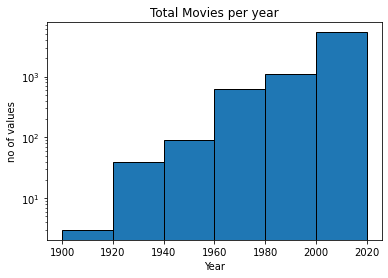

In [15]:
bins=[1900,1920,1940,1960,1980,2000,2020]
plt.hist(x, bins=bins,edgecolor='black',log=True)
plt.title('Total Movies per year')
plt.ylabel('no of values')
plt.xlabel('Year')

In [16]:
def split_mulcol(x):
    res = x.to_frame()
    opt = []
    
    for i, j  in x[x.notnull()].iteritems():
        
        for k in j.split(','):
            
            if not k in res.columns:
                opt.append(k)
                res[k] = False
            
            res.at[i, k] = True
    
    return res[opt]

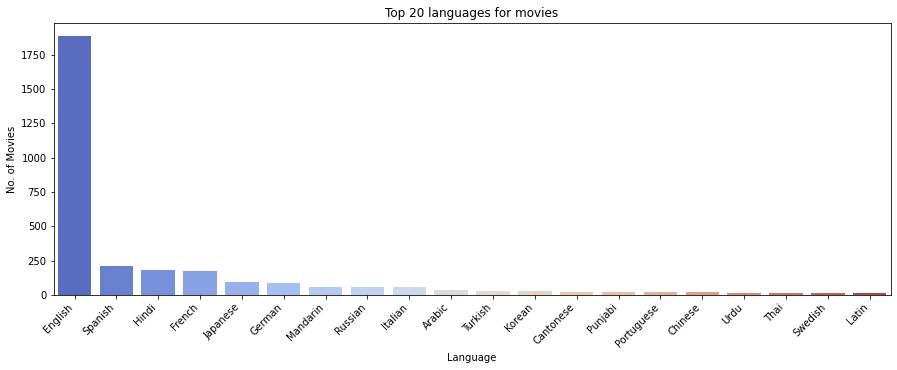

In [17]:
lang = split_mulcol(df["Language"])
lang = lang.sum().sort_values(ascending=False).reset_index()
lang = pd.DataFrame(lang.values, columns=['Language',"No. of Movies"])

plt.figure(figsize = (15,5))
lang = lang[:20]
ax = sns.barplot(x=lang["Language"], y= lang["No. of Movies"], data=lang ,palette = "coolwarm")
plt.title ("Top 20 languages for movies")
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel("Language")
plt.ylabel("No. of Movies")
plt.show()

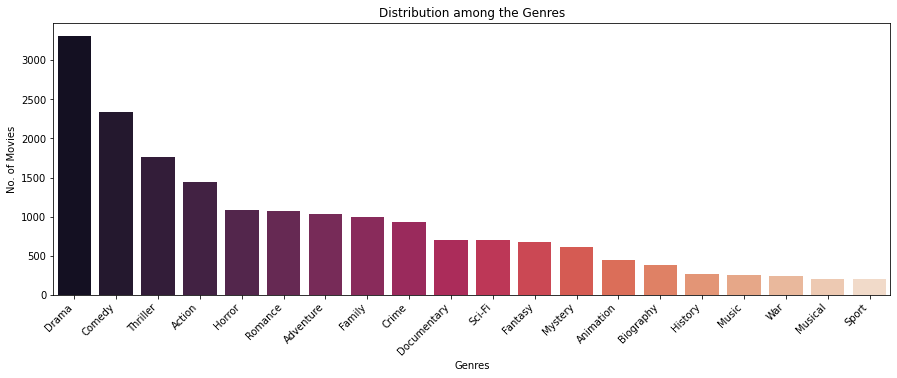

In [18]:
genres = split_mulcol(df["Genres"])
genres = genres.sum().sort_values(ascending=False).reset_index()
genres = pd.DataFrame(genres.values, columns=['Genre',"No. of Movies"])
genres = genres[:20]

plt.figure(figsize = (15,5))
ax = sns.barplot(x=genres["Genre"], y= genres["No. of Movies"], data=genres , palette = "rocket")
plt.title ("Distribution among the Genres")
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel("Genres")
plt.ylabel("No. of Movies")
plt.show()

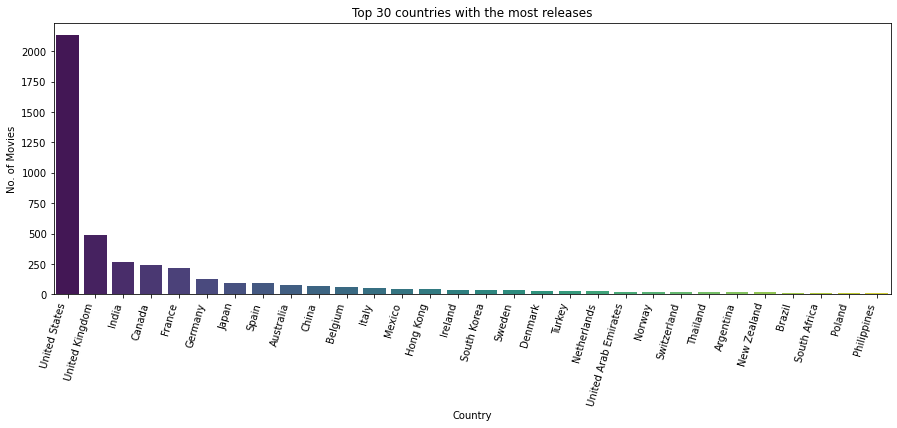

In [19]:
cont = split_mulcol(df["Country"])
cont = cont.sum().sort_values(ascending=False).reset_index()
cont = pd.DataFrame(cont.values, columns=['Country',"No. of Movies"])
cont = cont[:30]

plt.figure(figsize = (15,5))
ax = sns.barplot(x=cont["Country"], y= cont["No. of Movies"], data=cont , palette = "viridis")
plt.title ("Top 30 countries with the most releases")
plt.xticks(rotation = 74, ha = 'right')
plt.xlabel("Country")
plt.ylabel("No. of Movies")
plt.show()

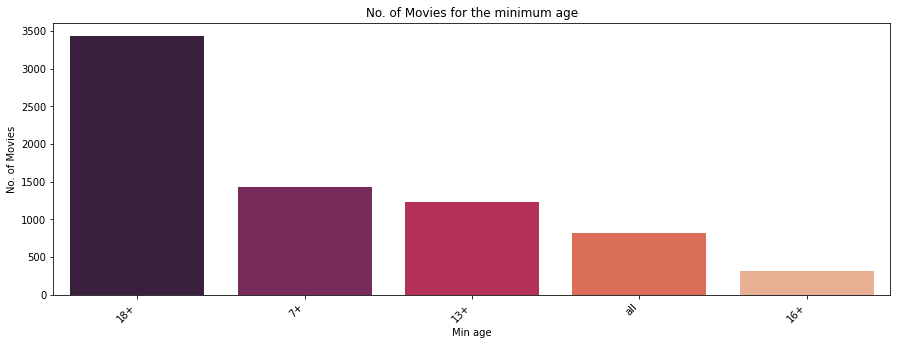

In [20]:
df_age = df.Age.value_counts().reset_index()
df_age = pd.DataFrame(df_age.values, columns = ['Age', "No. of Movies"]).sort_values('No. of Movies',ascending=False)

plt.figure(figsize = (15,5))
ax = sns.barplot(x=df_age["Age"], y= df_age["No. of Movies"], data=df , palette = "rocket")
plt.title ("No. of Movies for the minimum age")
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel("Min age")
plt.ylabel("No. of Movies")
plt.show()

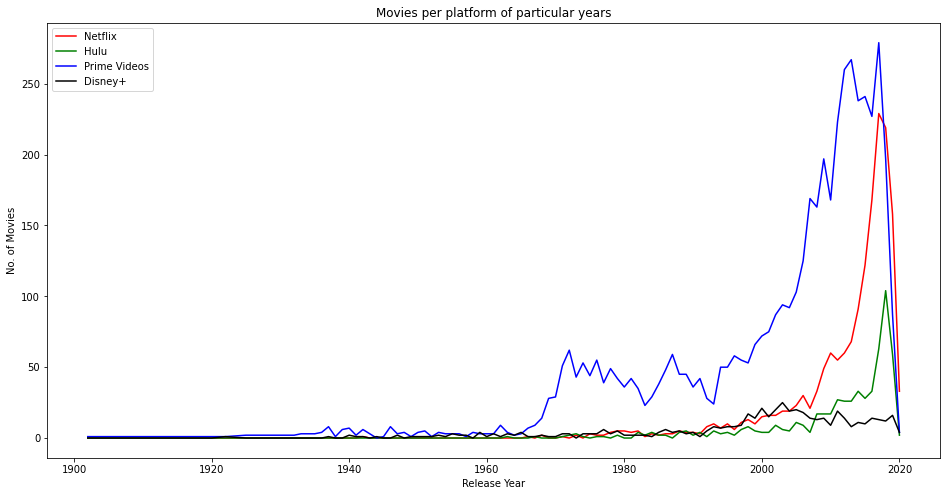

In [21]:
mpppy = df.groupby('Year')[['Netflix','Hulu','Prime Video','Disney+']].sum()
plt.figure(figsize = (16, 8))
sns.lineplot(x=mpppy.index,y=mpppy['Netflix'], color='red', label='Netflix')
sns.lineplot(x=mpppy.index,y=mpppy['Hulu'], color = 'green', label='Hulu')
sns.lineplot(x=mpppy.index,y=mpppy['Prime Video'], color = 'blue', label='Prime Videos')
sns.lineplot(x=mpppy.index,y=mpppy['Disney+'], color = 'black', label='Disney+')
plt.title("Movies per platform of particular years")
plt.legend()
plt.xlabel('Release Year')
plt.ylabel('No. of Movies')
plt.show()

In [22]:
genres = df['Genres'].str.get_dummies(',')
data = pd.concat([df,genres],axis=1,sort=False)

In [23]:
netflix = len(data[data['Netflix']==1])
hulu = len(data[data['Hulu']==1])
prime = len(data[data['Prime Video']==1])
disney = len(data[data['Disney+']==1])
Platform=['Netflix','Hulu','Prime Video','Disney+']
Count = [netflix,hulu,prime,disney]

fig = px.pie(names=Platform,values=Count,title='Movie Count Of Different Platforms',
            color_discrete_sequence=px.colors.sequential.Sunsetdark)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [24]:
features = data[['Action', 'Adventure', 'Animation',
                 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
                 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
                 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi',
                 'Short', 'Sport','Thriller', 'War', 'Western']].astype(int)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

In [27]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [28]:
tsne = TSNE(n_components=2)
transformed_genre = tsne.fit_transform(scaled_data)

In [29]:
distortions = []
K = range(1,100)
for k in K:
    kmean = KMeans(n_clusters=k)
    kmean.fit(scaled_data)
    distortions.append(kmean.inertia_)
fig = px.line(x=K,y=distortions,title='The Elbow Method Showing The Optimal K',
              labels={'x':'No of Clusters','y':'Distortions'})
fig.show()

In [30]:
cluster = KMeans(n_clusters=27)
group_pred = cluster.fit_predict(scaled_data)

tsne_df = pd.DataFrame(np.column_stack((transformed_genre,group_pred,data['Title'],data['Genres'])),columns=['X','Y','Group','Title','Genres'])

fig = px.scatter(tsne_df,x='X',y='Y',hover_data=['Title','Genres'],color='Group',
                 color_discrete_sequence=px.colors.cyclical.IceFire)
fig.show()